In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML;

# The Central Limit Theorem

A very important (and convenient) theorem for statistics.

It states that: 
>A random variable defined as the sum (or average) of a large number of independent and identically distributed random variables is itself approximately normally distributed.

But what does this mean in practice?

## Example: Binomial Distribition
Recall that the Binomial Distribution is the sum of Bernoulli trials, and that each Bernoulli trial is a random variable.

Then the central limit theorem tells us that a random variable defined as the sum (or average) of a large number of Bernoulli trials should be approximately normally distributed!

Let's test it out. First, lets just take the sum of 100 coin flips one time:

In [2]:
count = sum(np.random.binomial(n=1, p = 0.5, size=100))
count

46

And plot it (doesn't look like much yet):

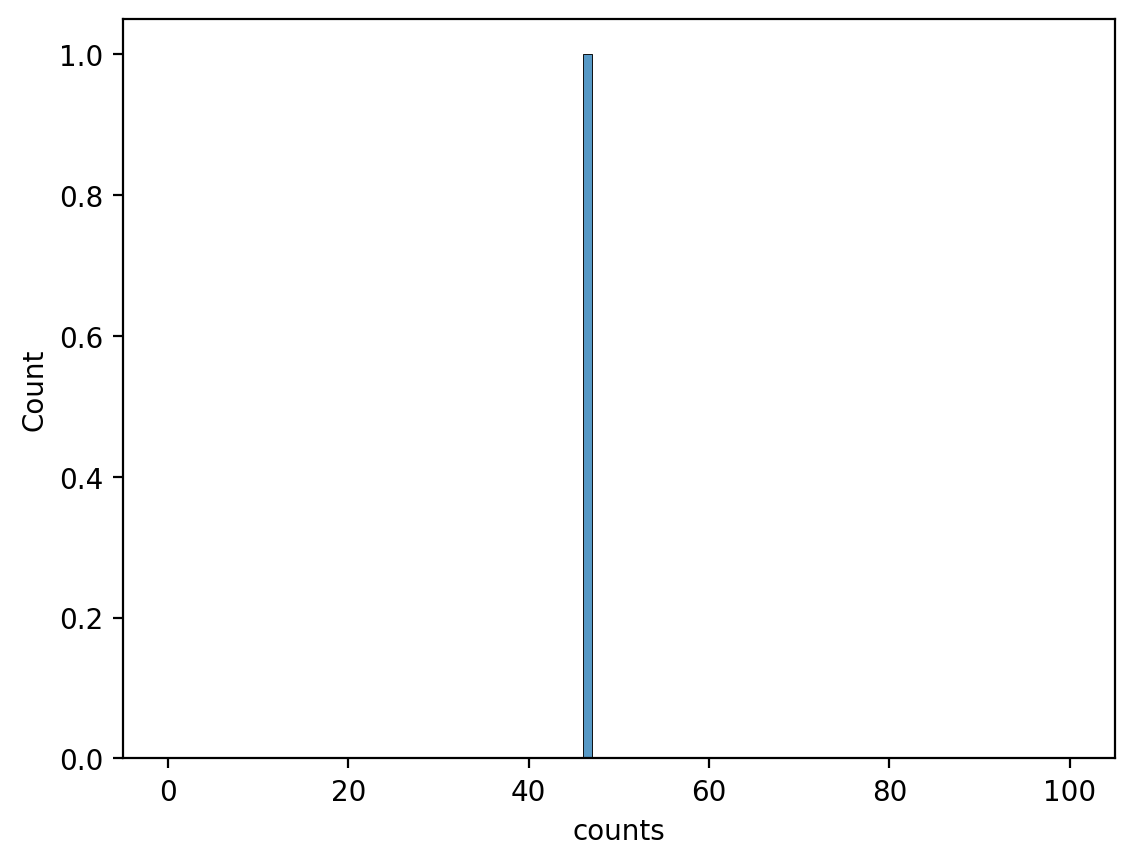

In [3]:
counts = np.array([count])
sns.histplot(pd.DataFrame({"counts":counts}), x="counts", binwidth=1, binrange=[0,100]);

Lets try a few more and see if it looks like anything yet:

In [4]:
counts = np.array([sum(np.random.binomial(n=1, p = 0.5, size=100)) for x in range(0,100)])

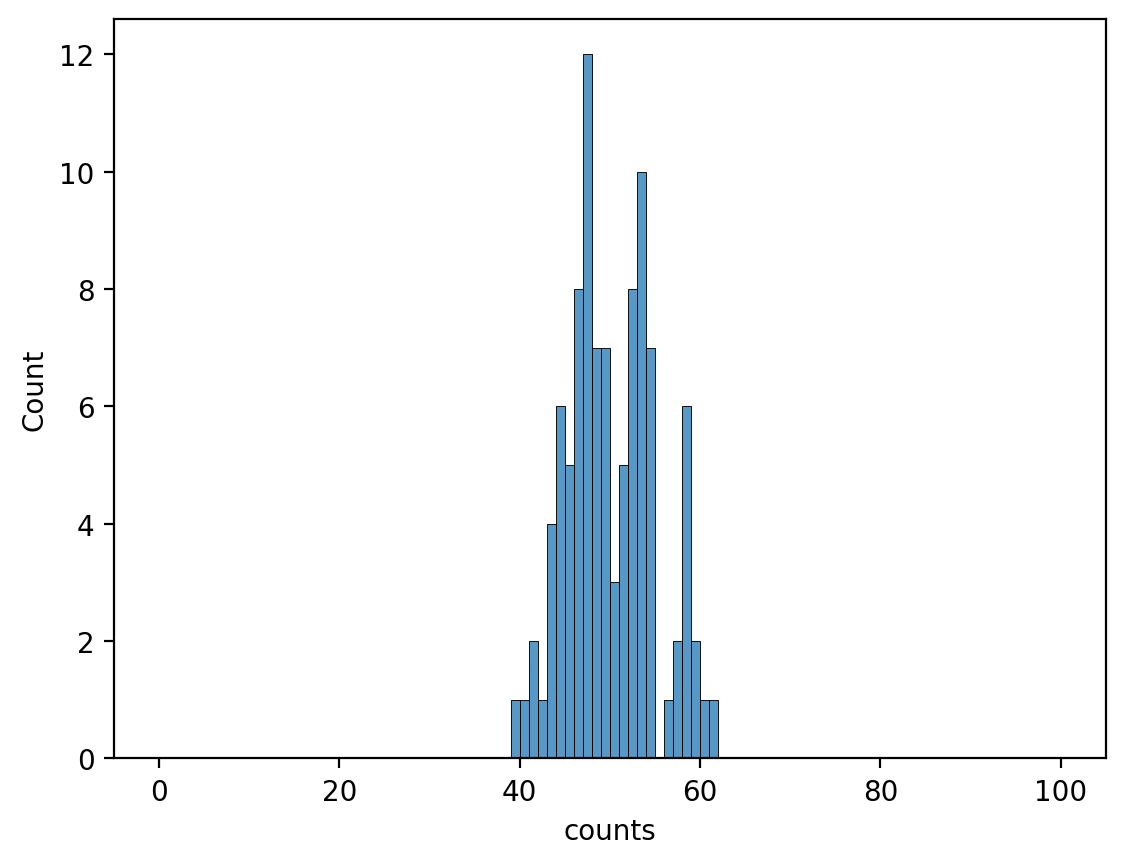

In [5]:
sns.histplot(pd.DataFrame({"counts":counts}), x="counts", binwidth=1, binrange=[0,100]);

And more:

In [6]:
counts = np.array([sum(np.random.binomial(n=1, p = 0.5, size=100)) for x in range(0, 10000)])

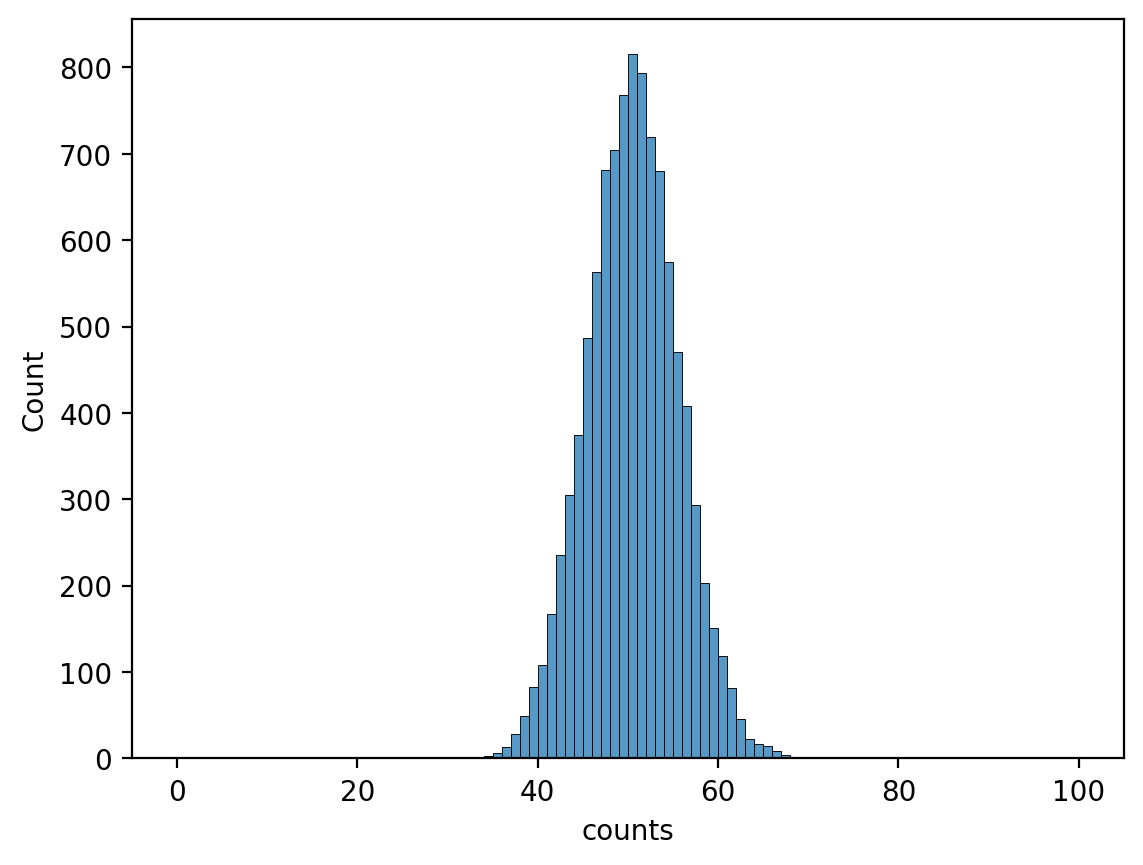

In [7]:
sns.histplot(pd.DataFrame({"counts":counts}), x="counts", binwidth=1, binrange=[0,100]);

Hmm that's starting to look familiar!

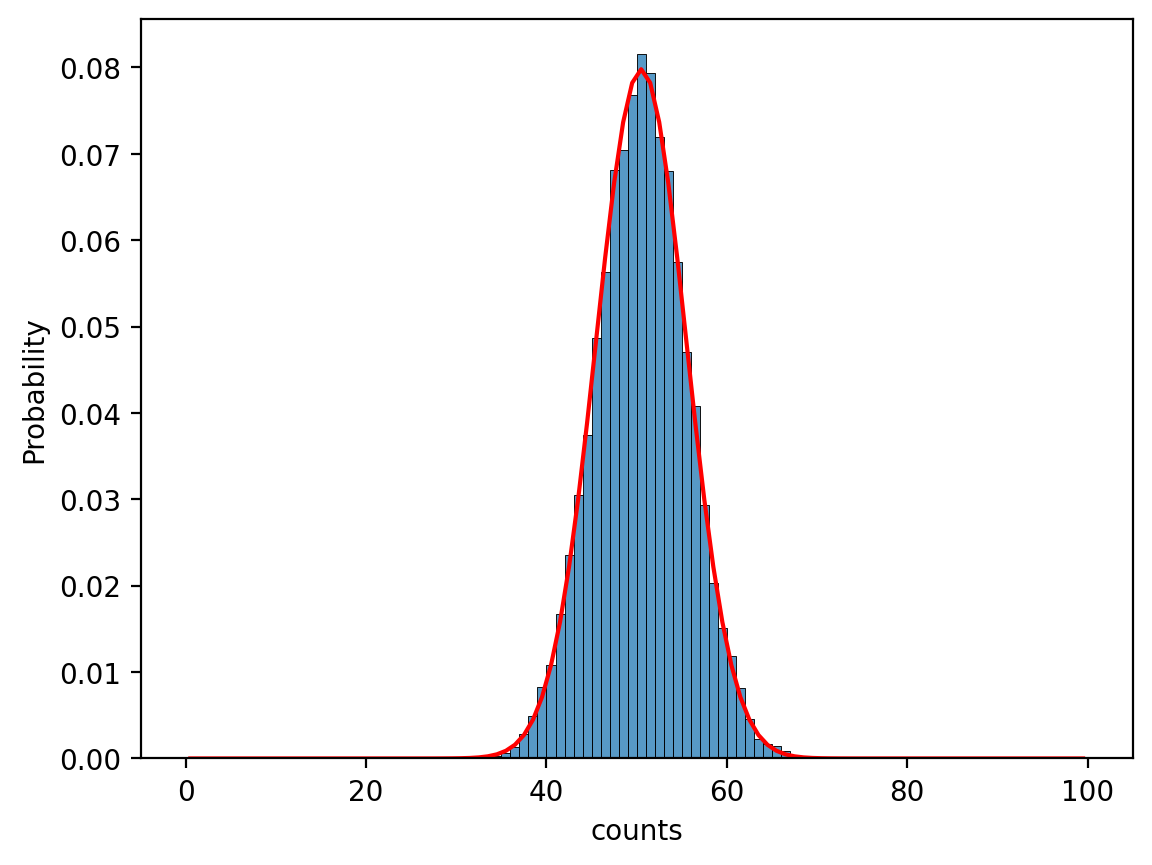

In [8]:
import math
from scipy.stats import norm
sns.histplot(pd.DataFrame({"counts":counts}), 
             x="counts", 
             binwidth=1, 
             binrange=[0,100], 
             stat="probability")
normEst = [norm.pdf(count, 
                    loc=50, 
                    scale=math.sqrt(25)) for count in range(0,100)] 
                    #Know mean and sd of Binomial
plt.plot(np.arange(.5, 100.5, 1), normEst, color="red");

Plotting a normal distribution (in red) over the probability of seeing each count total shows a pretty good match between the two, just like the central limit theorem told us!

## The Central Limit Theorem Formally
While for a binomial distribution we know how to compute the mean and standard deviation, for most distributions we have no idea. But the central limit theorem gives us a shortcut if we have a large enough sample! 

More formally, the (classical) central limit theorem states that:

> If $X_1,...,X_n$ are random variables with mean μ and standard deviation σ, and if n is large, then: $\frac{1}{n}(X_1+...+X_n)$ is approximately normally distributed with mean μ and standard deviation $\frac{σ}{\sqrt{n}}$. 


## Formal View of Sum of Bernoulli Trials

Recall that the mean μ of a Bernoulli trial with probability *p* is *p*, and its standard deviation σ is $\sqrt{p(1-p)}$. 


Now let's apply the central limit theorem to *n* Bernoulli trials:

> If $X_1,...,X_n$ are random variables with mean μ and standard deviation σ, and if n is large, then: $\frac{1}{n}(X_1+...+X_n)$ is approximately normally distributed with mean μ and standard deviation $\frac{σ}{\sqrt{n}}$. 


So the central limit theorem says tells us that for *n* Bernoulli trials, as *n* gets large, we should observe an approximately normal random distribution with mean $μ=p$ and standard deviation $σ=\sqrt{\frac{p(1-p)}{n}}$. 

We were previously considering the *sum* of *n* Bernoulli trials. Since these are independent events, we can use our knowldege of sums of expected values and variances of sums to say that:

The *sum* of *n* Bernoulli trials is approximately normal random distribution with mean $μ=np$ and standard deviation $σ=\sqrt{np(1-p)}$. 

We actualy already knew that for a Binomial distribution (which is the sum of Bernoulli trials) for *n* trials with a probability of success *p*,  the mean $μ=np$ and standard deviation $σ=\sqrt{np(1-p)}$, but it's good to see it check out!

## Applying the Central Limit Theorem

The central limit theorem tells us we should be able to do this for any sum of random variables. Let's take a slightly more complicated distribution now.

If we take the sum of 100 dice rolls, will that also give us a normal distribution, and what is that distributions mean and variance?

Let's start with a visialization again. First, we need code for rolling 100 dice:

In [9]:
np.random.randint(low=1, high=7, size=100)

array([4, 6, 3, 3, 1, 1, 6, 1, 3, 6, 5, 6, 1, 4, 6, 4, 5, 3, 4, 2, 6, 1,
       2, 6, 5, 3, 3, 4, 6, 5, 6, 2, 2, 1, 6, 2, 6, 1, 5, 5, 3, 3, 5, 3,
       3, 2, 4, 6, 4, 4, 2, 5, 2, 1, 1, 4, 2, 6, 3, 1, 3, 6, 2, 3, 3, 5,
       4, 1, 4, 6, 1, 3, 6, 3, 3, 3, 4, 6, 1, 1, 6, 5, 3, 2, 1, 1, 6, 4,
       5, 5, 4, 2, 3, 4, 2, 5, 6, 2, 3, 5])

Next, we compute the sum of 100 dice:

In [10]:
sum(np.random.randint(low=1, high=7, size=100))

345

Then we do that many times (let's say 10,000 again):

In [11]:
counts = np.array([sum(np.random.randint(low=1, high=7, size=100)) for x in range(0, 10000)])

Let's plot it and see what it looks like:

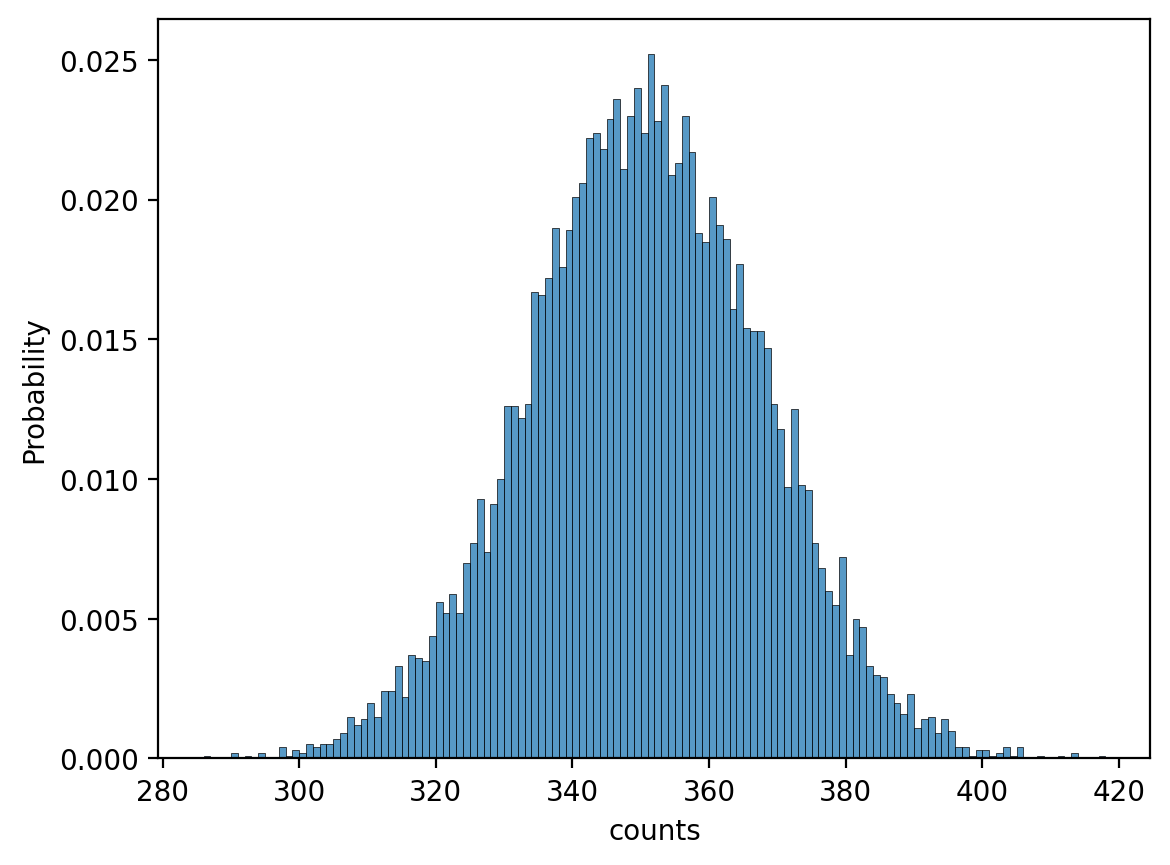

In [12]:
sns.histplot(pd.DataFrame({"counts":counts}), x="counts", binwidth=1, stat="probability");

Looks pretty normal! 

The central limit theorem tells us it should be approximately normally distributed. Let's think about how the central limit theorem can be applied to this type of problem.

First we need to calculate the expected value and standard deviation of a dice roll. We can think back to previous lectures for how to calculate those:

$$ E[X] \equiv \sum_{-\infty}^{+\infty} x\cdot  P[X=x] $$

$$ \text{Var} (X) \equiv E[(X - \overline{X})^2]. $$

Plugging in the values and probablites of dice rolls:

$$ E[X] = 1/6*(1+2+3+4+5+6) = 3.5 $$

$$ \text{Var} (X) = 1/6*((1-3.5)^2+(2-3.5)^2+(3-3.5)^2+(4-3.5)^2+(5-3.5)^2+(6-3.5)^2) \\ = 35/12 $$


Don't forget, standard deviation is the square root of the variance:

$$ σ = \sqrt{35/12} $$

And what did the Central Limit Theorem tell us about the sum of random variables?

> If $X_1,...,X_n$ are random variables with mean μ and standard deviation σ, and if n is large, then: $\frac{1}{n}(X_1+...+X_n)$ is approximately normally distributed with mean μ and standard deviation $\frac{σ}{\sqrt{n}}$. 

Like before, we're actually considering $X_1+...+X_n$, so based on linearity of expectation, it should be approximately normally distributed with mean $nμ$ and standard deviation $σ\sqrt{n}$. 

So the mean should be $100*3.5=350$ and the standard deviation should be $\sqrt{100}*\sqrt{35/12} = 10\sqrt{35/12}$

Plotting that over our data shows we have a pretty good fit!

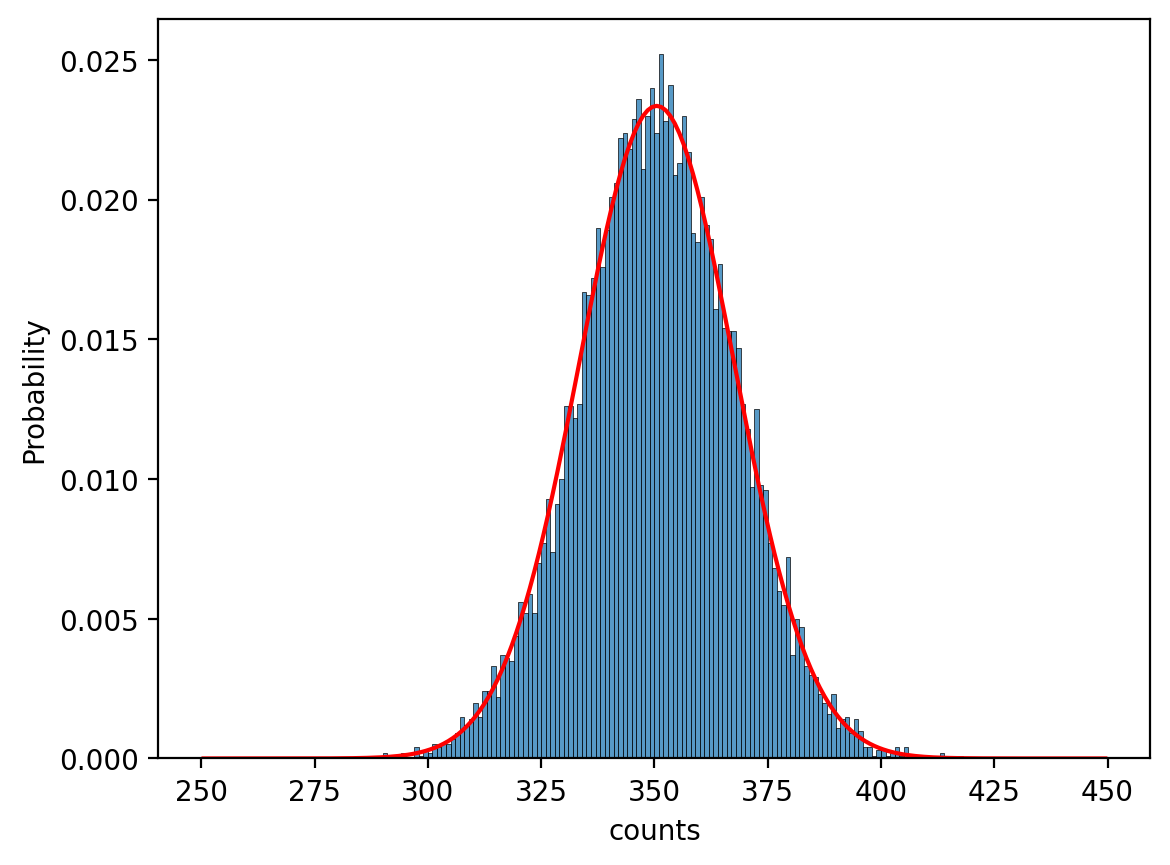

In [13]:
from scipy.stats import norm # import normal distribution from SciPy
sns.histplot(pd.DataFrame({"counts":counts}), x="counts", binwidth=1, stat="probability");
normEst = [norm.pdf(count, loc=350, scale=10*math.sqrt(35/12)) for count in range(250,450)] 
#True sample distribution
plt.plot(np.arange(250.5, 450.5, 1), normEst, color="red");

##  The Usefulness of Central Limit Theorem
In our first example, we knew that the sum of Bernoulli trials would give us a Binomial distribution, which has a known mean and standard deviation.

In our second example, looked at the sums of dice rolls and observed that the outcome also looked normal, and we could determine the mean and standard deviation of that distribution.

The first crucial thing to remember, is that this applies to the sum of ANY RANDOM VARIABLE. You can start with chaos and end with up with a normal distribution.

Normal distributions have a known CDF, so we can easily make calculations about the probabilies of events from it.

As a silly example, we could ask what is the probability that the sum of 100 dice rolls will be less than or equal to 400?

In [14]:
import math
from scipy.stats import norm # import normal distribution from SciPy
norm.cdf(x = 400, loc=350, scale=10*math.sqrt(35/12))

0.9982926044109411

There's even a handy "68, 95, 99.7 rule" for normal distributions:
- 68% of all values are within 1 standard deviation of the mean
- 95% are within 2 standard deviations
- 99.7% are within 3 standard deviations

Next we will see an even more incredible result of the Central Limit Theorem that concerns **sampling** from large populations with potentially unkown distributions. We will see that we can estimate the error of a sample from a population using the central limit theorem.